In [19]:
import os
import numpy as np
from matplotlib import pyplot as plt 


In [20]:
cwd = os.getcwd()

In [21]:
EX_data = np.load('ex_eeg.npy')

In [22]:
EX_data

array([-10.780263 ,  -9.551682 ,  -8.494575 , ...,   2.3312118,
         2.207287 ,   1.9089584], dtype=float32)

In [23]:
samples = len(EX_data)
sampling_rate = 500
transformed_data = np.fft.fft(EX_data)
frequency =  np.fft.fftfreq(len(transformed_data),1/sampling_rate)
frequency
print(len(transformed_data))
timeline = np.linspace(0, samples/500, samples, endpoint=False)
transformed_data

278000


array([ -5827.47320613   +0.j        ,   7513.72010075+6284.33884989j,
        -4387.34017768+5718.45329476j, ...,
       -10490.44492277 +605.93919417j,  -4387.34017768-5718.45329476j,
         7513.72010075-6284.33884989j])

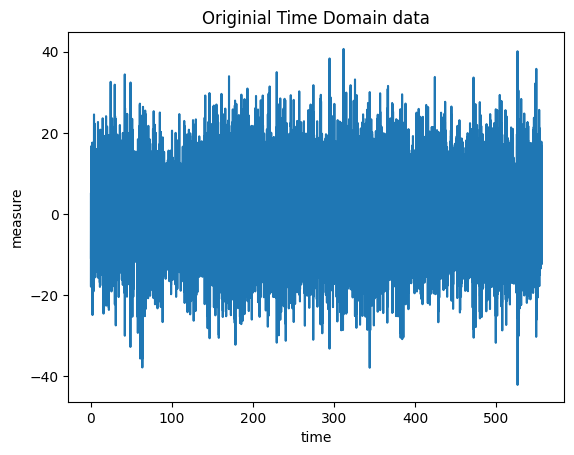

In [24]:
fig,ax = plt.subplots()
x = timeline
y = EX_data
ax.plot(x,y)
plt.title('Originial Time Domain data')
ax.set_xlabel('time')
ax.set_ylabel('measure')
plt.show()

In [25]:
# Extract the alpha band
positive_frequencies = frequency[frequency >= 0]
alpha_indices = np.where((positive_frequencies >= 8) & (positive_frequencies <= 12))
magnitude = np.abs(transformed_data[frequency >=0 ])
power_spectral = np.abs(transformed_data)**2 / samples
alpha_frequencies = positive_frequencies[alpha_indices]
alpha_spectral = power_spectral[alpha_indices]

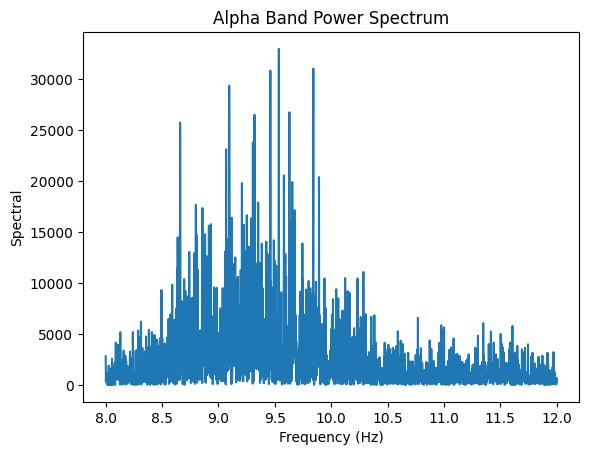

In [26]:
plt.figure()
plt.plot(alpha_frequencies, alpha_spectral)
plt.title('Alpha Band Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral')
plt.show()

In [27]:
# Import the FOOOF object
from fooof import FOOOF

# Import some internal functions
#   These are used here to demonstrate the algorithm
#   You do not need to import these functions for standard usage of the module
from fooof.sim.gen import gen_aperiodic
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_peak_search

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

In [28]:
power_spectrum = np.abs(transformed_data)**2
power_spectrum

array([3.39594440e+07, 9.59489045e+07, 5.19494619e+07, ...,
       1.10416597e+08, 5.19494619e+07, 9.59489045e+07])

In [29]:
# Import some internal functions
#   These are used here to demonstrate the algorithm
#   You do not need to import these functions for standard usage of the modu 
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_peak_search

In [30]:
plt_log = False


In [31]:
fm = FOOOF()
#Well I manually changed the spectrum, but let me just use the original data and do it Fooof way now so I can follow the original example haha
fm.add_data(transformed_data, power_spectral, [8, 12])

C:\Users\hunte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\fooof\objs\fit.py:1163: ComplexWarning: Casting complex values to real discards the imaginary part
  freqs = freqs.astype('float64')


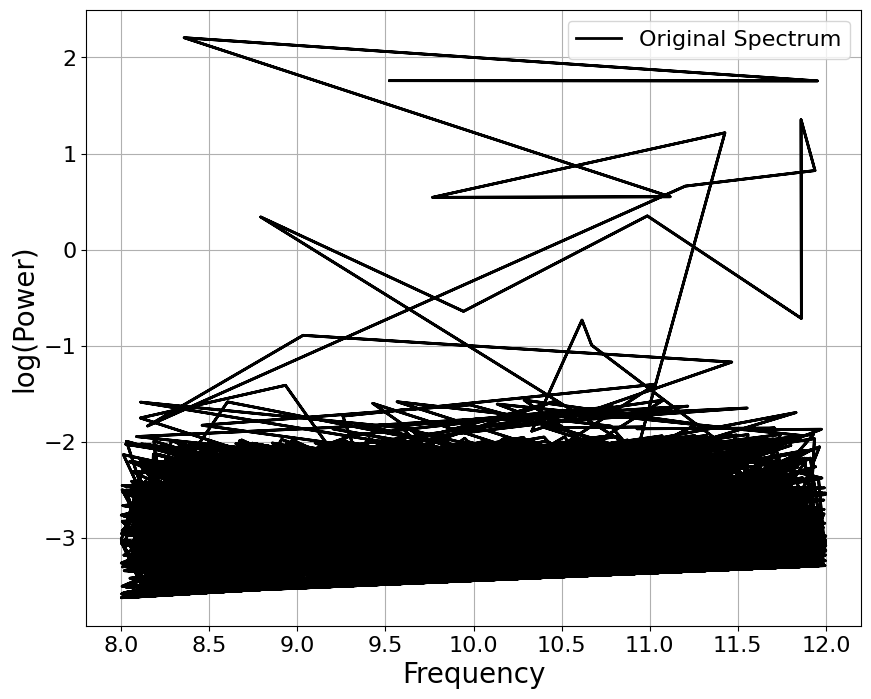

In [32]:
fm.plot(plt_log)

In [33]:
# Fit the power spectrum model
fm.fit(transformed_data, power_spectral, [8, 12])


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.43 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



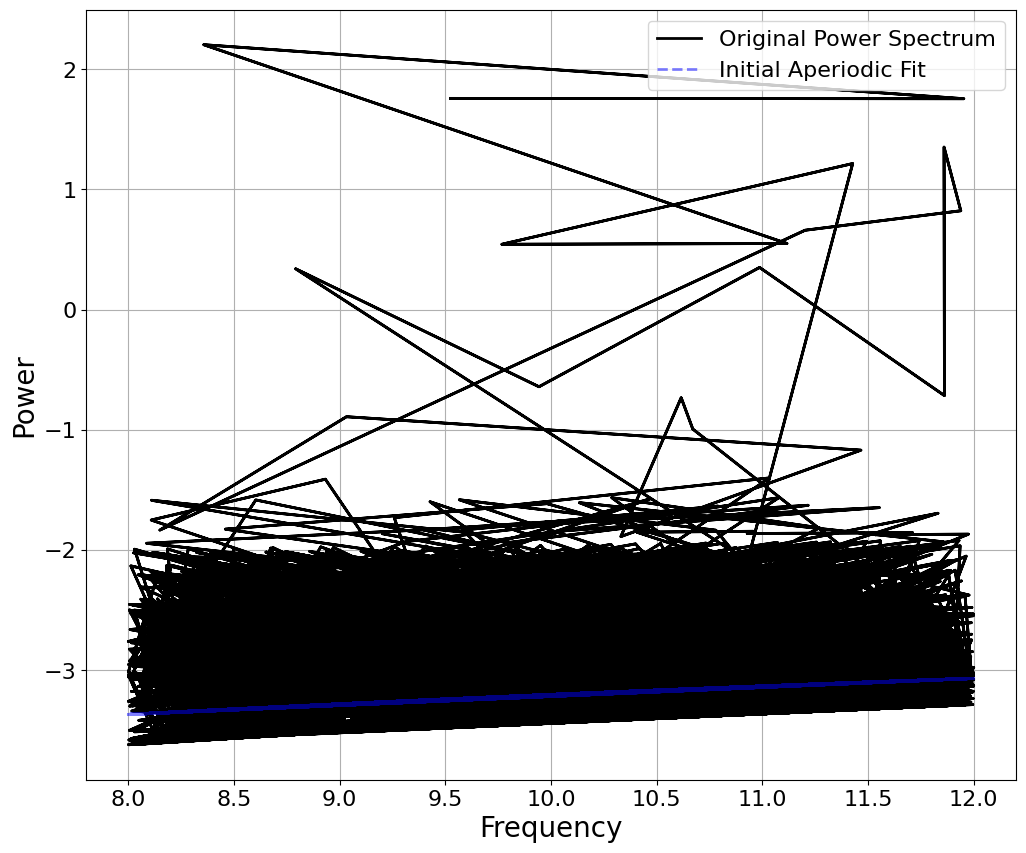

In [34]:
# Copied from code earlier
# Do an initial aperiodic fit - a robust fit, that excludes outliers
#   This recreates an initial fit that isn't ultimately stored in the FOOOF object
init_ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))

# Plot the initial aperiodic fit
_, ax = plt.subplots(figsize=(12, 10))
plot_spectrum(fm.freqs, fm.power_spectrum, plt_log,
              label='Original Power Spectrum', color='black', ax=ax)
plot_spectrum(fm.freqs, init_ap_fit, plt_log, label='Initial Aperiodic Fit',
              color='blue', alpha=0.5, linestyle='dashed', ax=ax)

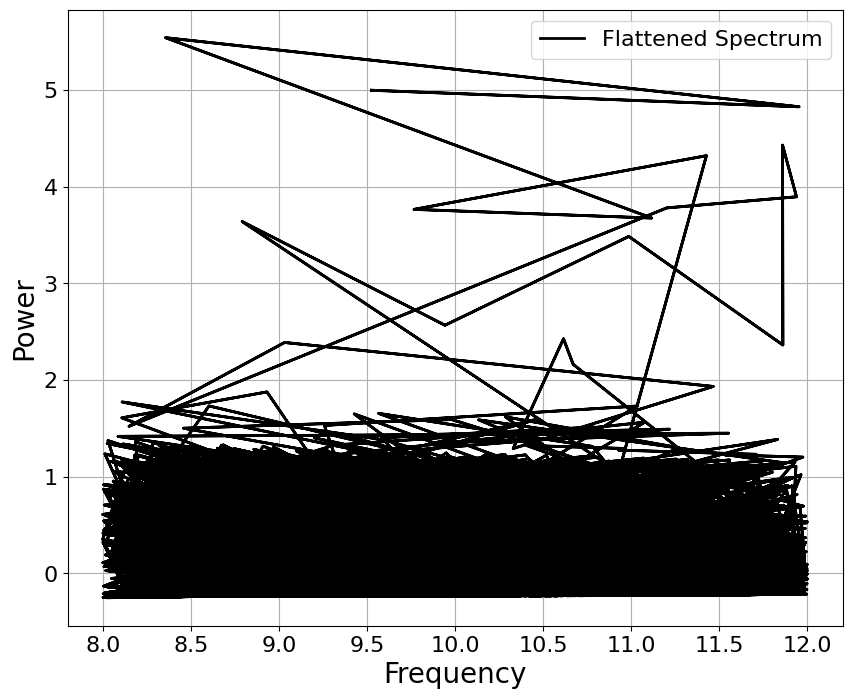

In [35]:
# Recompute the flattened spectrum using the initial aperiodic fit
init_flat_spec = fm.power_spectrum - init_ap_fit

# Plot the flattened the power spectrum
plot_spectrum(fm.freqs, init_flat_spec, plt_log,
              label='Flattened Spectrum', color='black')

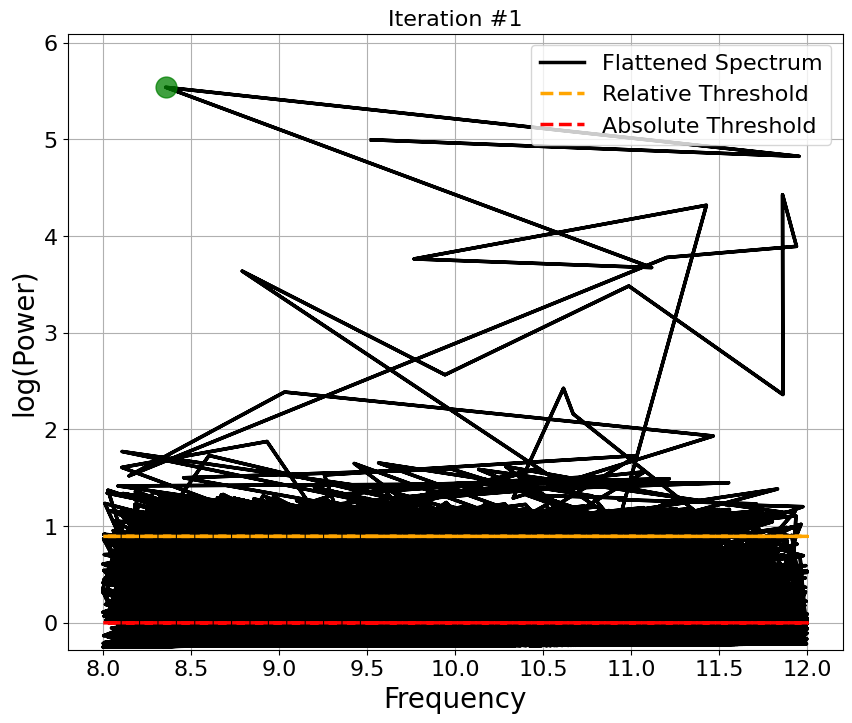

In [36]:
# Plot the iterative approach to finding peaks from the flattened spectrum
plot_annotated_peak_search(fm)

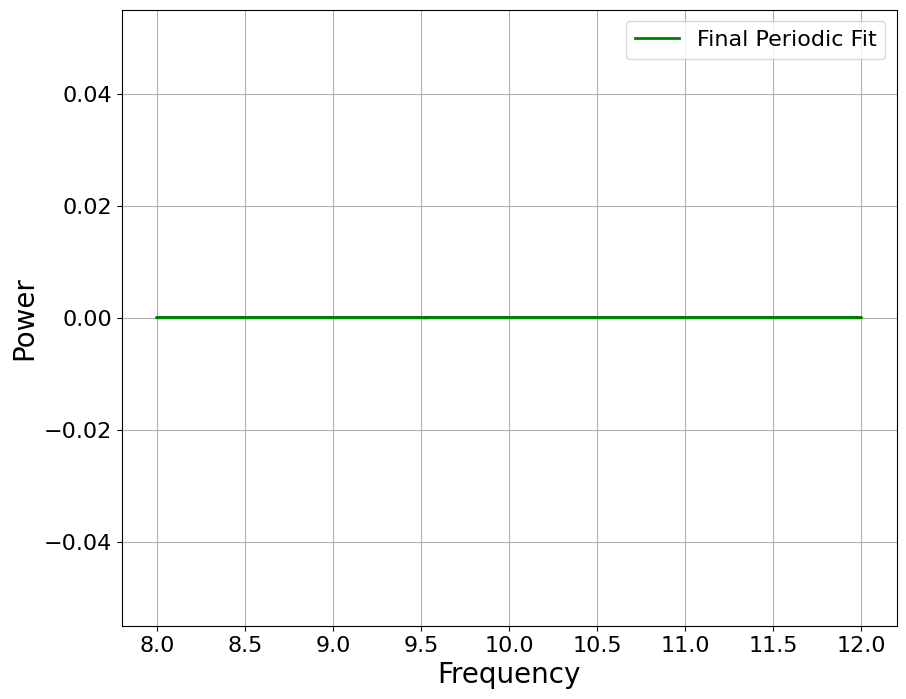

In [37]:
plot_spectrum(fm.freqs, fm._peak_fit, plt_log, color='green', label='Final Periodic Fit')